# E2.1

Joyce Araújo - 1213110 Gabriela Bevilacqua - 1511241

Enunciado: Redução de Dimensionalidade
<br>
1) Com o dataset de vinhos, faça uma redução de dimensionalidade para plotar os dados em 2D. Utilize cores distintas para as diversas classes de vinho. Faça isso utilizando PCA e MDS. Discuta as diferenças entre os dois resultados.
<br>
2) Utilizando o seaborn, faça um grid cujas colunas são os níveis de qualidade dos vinhos e as linhas são os diversos atributos (do dataset original, e não do redimensionado).


## Wine Quality DataFrame

In [34]:
import pandas as pd

csv_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_raw = pd.read_csv(csv_file, sep=";")
wine_data = pd.DataFrame(wine_raw)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## PCA

In [35]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(seed=668)

colors = ['#435070', '#72acaa', '#c5d377', '#ffe28f', '#8f3d5e', '#7670ab']
features = ["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides" ,"total sulfur dioxide","density","pH","sulphates", "alcohol"]

# Separating out the features
data = wine_data.values
# Separating out the features
x = wine_data.loc[:, features].values
# Separating out the target
y = wine_data.loc[:,['quality']].values

x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-1.637520,1.481439
1,-0.754890,1.937133
2,-0.745354,1.433245
3,2.360144,-0.473182
4,-1.637520,1.481439


In [5]:
finalDf = pd.concat([principalDf, wine_data[['quality']]], axis = 1)
finalDf = finalDf.sort_values('quality')
finalDf.head()

,principal component 1,principal component 2,quality
1478,-1.197221,1.926922,3
832,1.687588,-0.006046,3
899,-1.546539,1.761545,3
1374,-1.397953,1.674917,3
459,2.730172,1.130188,3


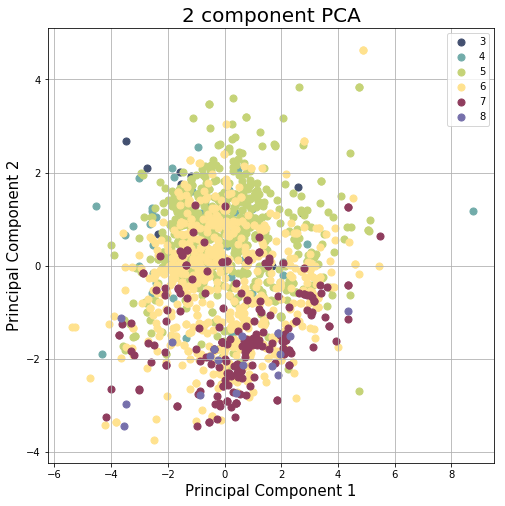

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf.quality.unique()
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## MDS

In [63]:
import scipy.spatial.distance
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances

# Separating out the features
data = wine_data.values
# Separating out the features
x = wine_data.loc[:, features].values
# Separating out the target
y = wine_data.loc[:,['quality']].values

D = pdist(x, metric='euclidean')
D = squareform(D)
# D = pairwise_distances(x, metric="euclidean")
print(D.shape)

mds = MDS(n_components=2, dissimilarity='precomputed')
fit_t = mds.fit_transform(D)

(1599, 1599)


In [64]:
principalComponents = fit_t
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['mds 1', 'mds 2'])
principalDf.head()

,mds 1,mds 2
0,2.468529,12.195025
1,-3.479081,-20.284037
2,-1.158502,-7.491009
3,-5.009938,-12.931484
4,2.468421,12.195043


In [65]:
finalDf = pd.concat([principalDf, wine_data[['quality']]], axis = 1)
finalDf = finalDf.sort_values('quality')
finalDf.head()

,mds 1,mds 2,quality
1478,8.643781,31.504470,3
832,-2.284649,-1.212421,3
899,5.664555,35.068282,3
1374,4.327571,16.946286,3
459,2.550907,-1.041779,3


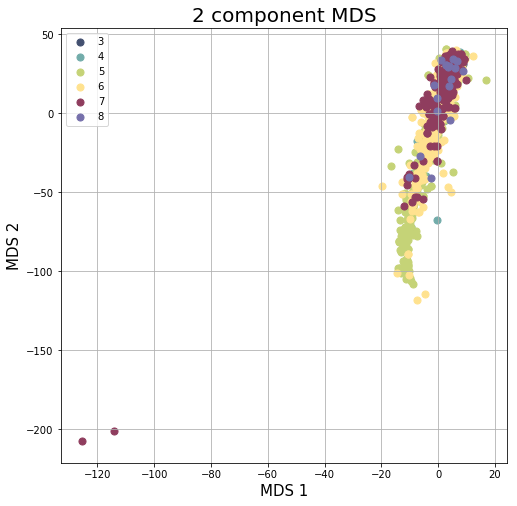

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('MDS 1', fontsize = 15)
ax.set_ylabel('MDS 2', fontsize = 15)
ax.set_title('2 component MDS', fontsize = 20)
targets = finalDf.quality.unique()
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'mds 1']
               , finalDf.loc[indicesToKeep, 'mds 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

### Análise
O método de redução de dimensionalidade do PCA preserva a covariância entre os dados enquanto o MDS preserva a distância entre os data points, no caso usamos a distância euclidiana.
<br>
<br>
Por isso no gráfico do PCA os vinhos de qualidade 5 e 6 estão um pouco mais separados dos vinhos de qualidade 7 e 8. Apesar de terem alguns vinhos de qualidade 7, principalmente, que tem "features" ou atributos parecidos com vinhos de qualidade 5/6. Também é possível ver que os poucos data points de vinhos de qualidade 3 e 4 se encontram mais separados dos vinhos de qualidade mais alta. Com o fato de terem muito mais vinhos de qualidade 5 e 6 é um pouco mais difícil ver as separações entre as qualidades, mas é certo que vinhos de qualidade X tenham atributos mais fixos em uma determinada faixa e em algum momento ocorre a transição para outra faixa dos vinhos de qualidade X + 1. O que não se esperava tanto era que muitos dos vinhos de qualidade 7 e 8 tivessem em faixas parecidas com os vinhos de qualidade 5 e 6, mas isso pode ser devido a falta de diversidade nos exemplos no dataset de entrada.
<br>
<br>
No método do MDS é possível ver que existe quase um alinhamento dos vinhos de menor qualidade para os vinhos de maior qualidade. Fica claro pelo gráfico que os vinhos de qualidade 5 estão mais na parte de baixo e muda graduamente para vinhos de qualidade 6, 7 e 8. Novamente, a falta de diversidade no dataset de entrada responde pela visualização precária de vinhos de qualidade 3 e 4, e os outliers também.

## Grid

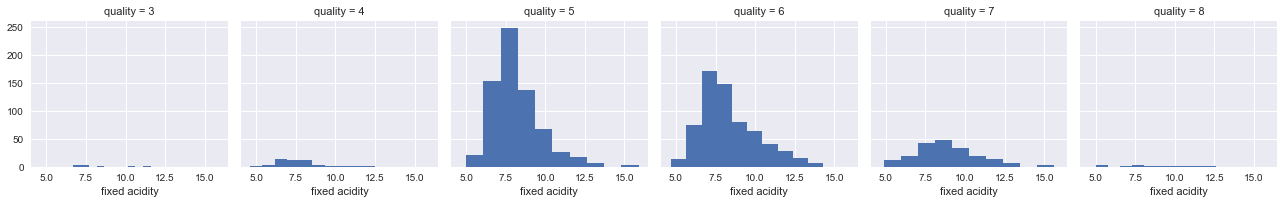

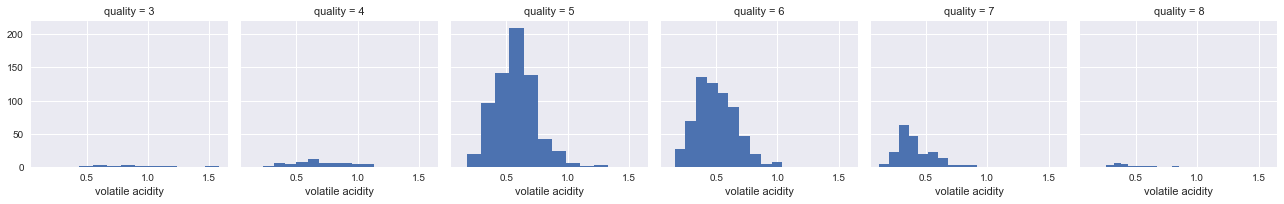

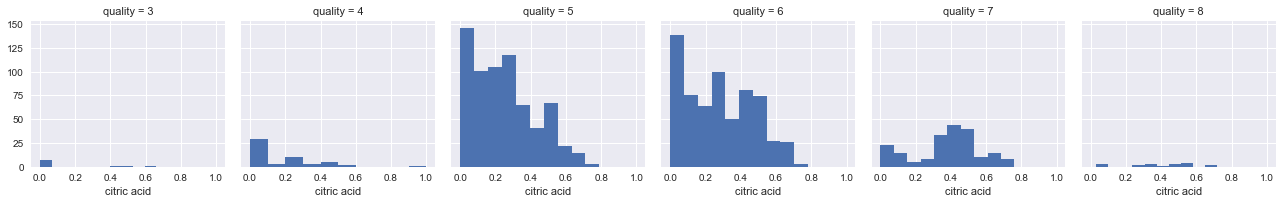

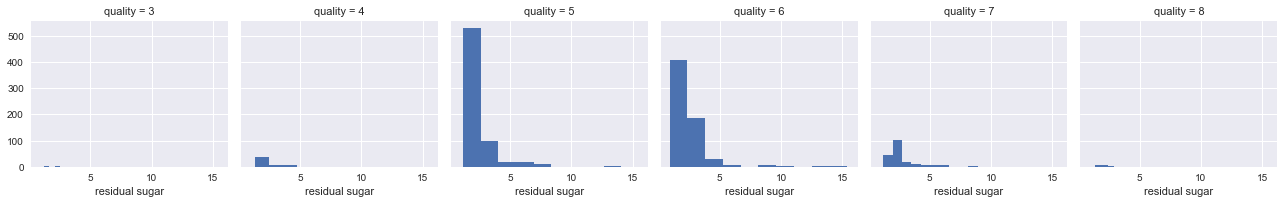

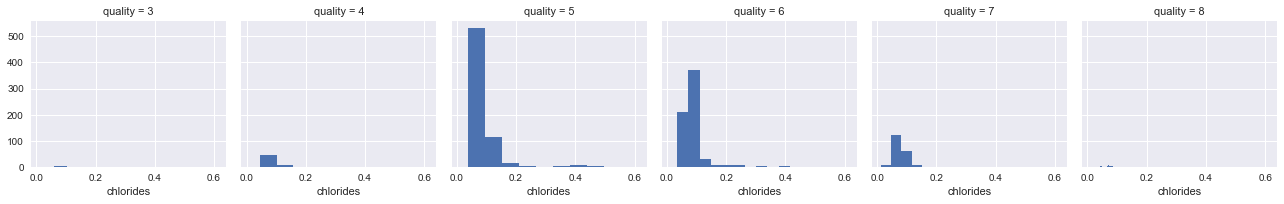

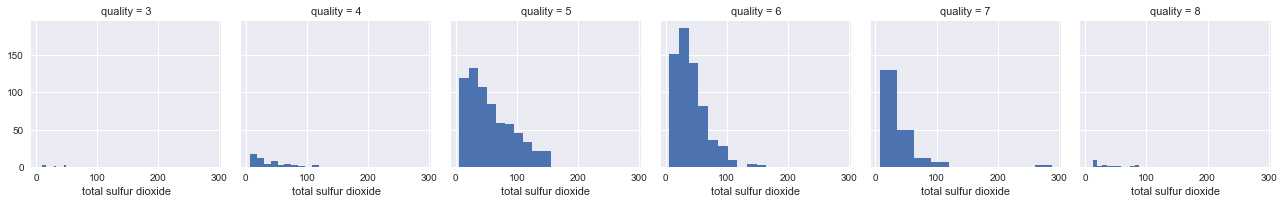

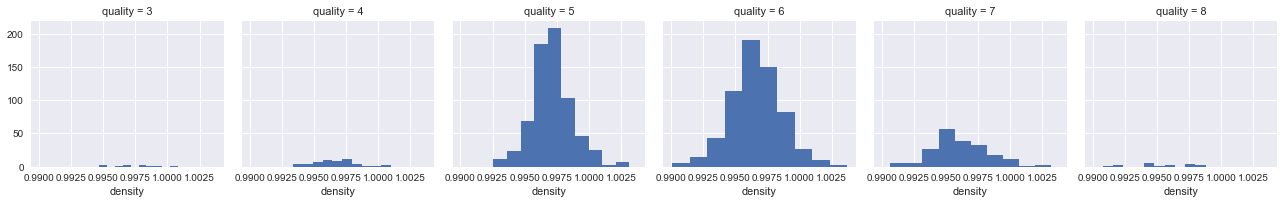

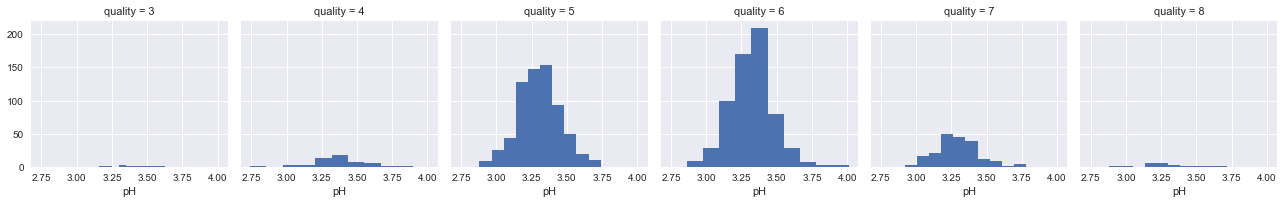

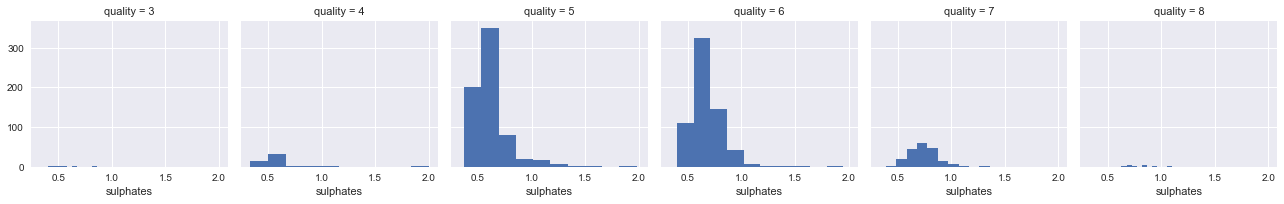

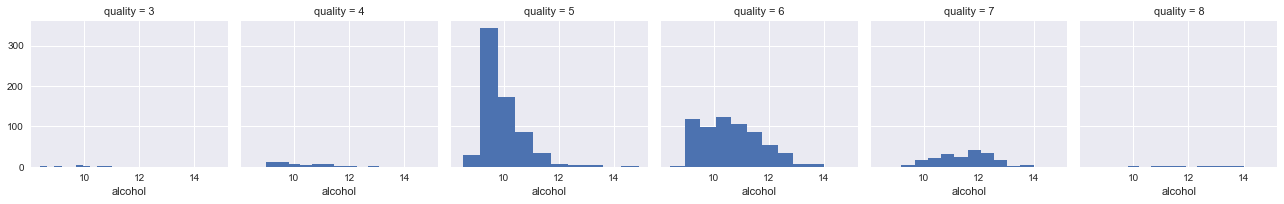

In [39]:
import seaborn as sns; sns.set()
features_all = ["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides" ,"total sulfur dioxide","density","pH","sulphates", "alcohol"]

for f in features_all:
    g = sns.FacetGrid(wine_data, col="quality")
    g.map(plt.hist, f);
    plt.show()

## Resumo do Grid
<br>
O grid entre as qualidades dos vinhos e os atributos nos permite visualizar e descobrir informações sobre o dataset que podem não ser tão claras de imediato. Por exemplo, a quantidade de alcool nos vinhos parece aumentar de acordo com a qualidade do vinho, assim como a quantidade de sulfatos. Por outro lado, o pH dos vinhos parece se manter em uma faixa específica de mais ou menos 3.0 a 3.75 independente da qualidade do vinho. Essa análise se aplica analogamente aos outros atributos, e deixa mais claro quais atributos influenciam mais na qualidade do vinhos e quais influenciam menos (variam menos entre vinhos de qualidades diferentes).